In [39]:
import pandas as pd
import numpy as np

In [40]:
ap_data = pd.read_excel("all_data_model.xlsx")

In [41]:
ap_data.set_index(ap_data['date'], inplace=True)

In [42]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 672 entries, 2019-09-20 00:00:00 to 2019-10-17 23:00:00
Data columns (total 18 columns):
date              672 non-null datetime64[ns]
all_num           672 non-null int64
temp              672 non-null float64
humid             672 non-null float64
co2               672 non-null float64
voc               672 non-null float64
pm25              672 non-null float64
light             672 non-null float64
noise             672 non-null float64
기온                672 non-null float64
강수량               672 non-null float64
풍속                672 non-null float64
습도                672 non-null int64
date_day          672 non-null int64
date_hour         672 non-null int64
date_weekday      672 non-null int64
model_number_1    672 non-null float64
model_number_2    672 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(5)
memory usage: 99.8 KB


Text(0, 0.5, '대여횟수')

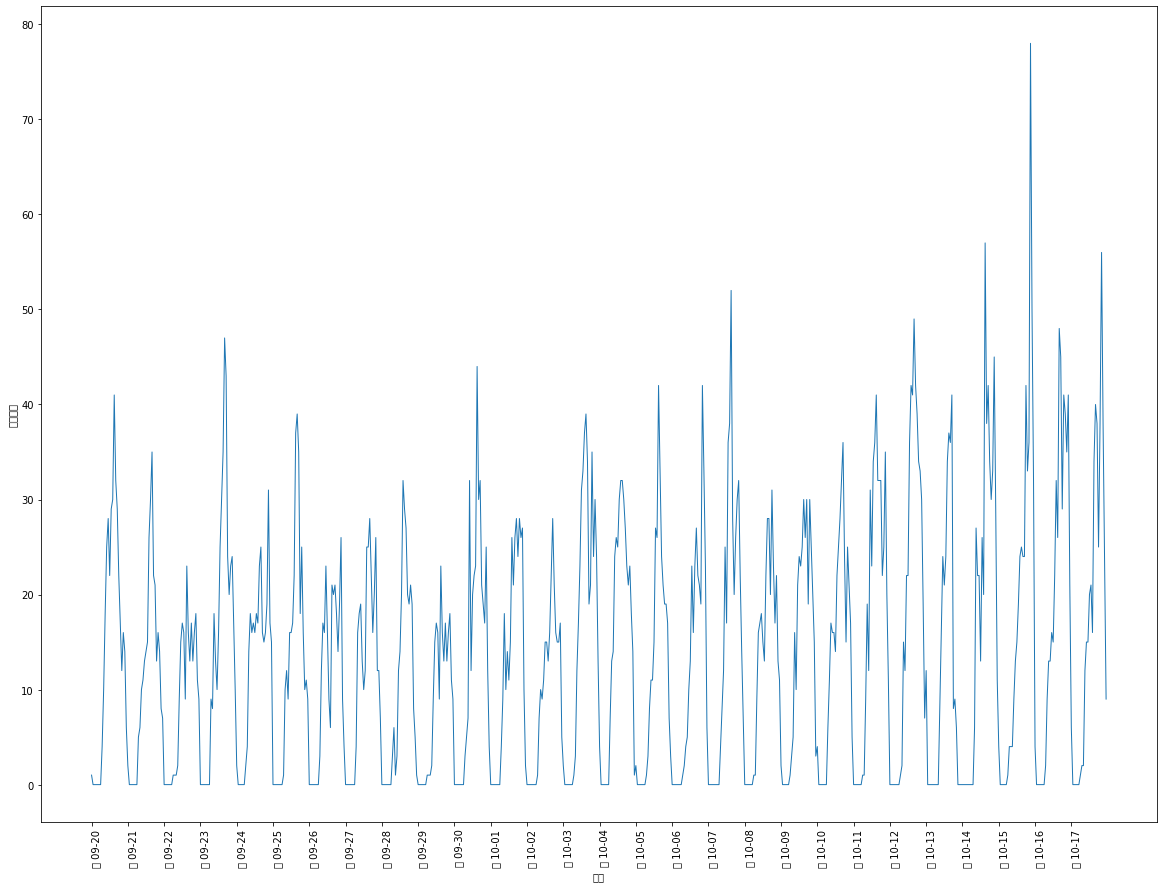

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,15))
xticks = pd.date_range(start = '2019-09-20', end ='2019-10-17')
week  = ["일","월","화","수","목","금","토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"),
                                             xticks.strftime(" %m-%d"))]
plt.xticks(xticks,xticks_name , rotation = 90, ha = "left")
plt.plot(ap_data['all_num'],linewidth = 1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")

In [44]:
from sklearn.preprocessing import minmax_scale

df = pd.DataFrame()
df['date'] = ap_data['date']
df['model_number_1'] = minmax_scale(ap_data['model_number_1'], axis=0, copy=True)
df['humid']= minmax_scale(ap_data['humid'], axis=0, copy=True)
df['hour']= minmax_scale(ap_data['date_hour'], axis=0, copy=True)
df['weekday']= minmax_scale(ap_data['date_weekday'], axis=0, copy=True)
df['temp']= minmax_scale(ap_data['temp'], axis=0, copy=True)
df['기온']= minmax_scale(ap_data['기온'], axis=0, copy=True)
df['습도']= minmax_scale(ap_data['습도'], axis=0, copy=True)
df['강수량']= minmax_scale(ap_data['강수량'], axis=0, copy=True)
df['풍속']= minmax_scale(ap_data['풍속'], axis=0, copy=True)
df['voc']= minmax_scale(ap_data['voc'], axis=0, copy=True)
df['co2']= minmax_scale(ap_data['co2'], axis=0, copy=True)
df['pm25']= minmax_scale(ap_data['pm25'], axis=0, copy=True)
df['light']= minmax_scale(ap_data['light'], axis=0, copy=True)
df['noise']= minmax_scale(ap_data['noise'], axis=0, copy=True)

df.set_index(df['date'], inplace=True)

In [45]:
y = ap_data['all_num'].values
X = ap_data.index.astype("int64").values.reshape(-1,1)

In [46]:
n_train = 470

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train,y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train,y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize = (15,15))
    
    plt.xticks(range(0, len(X), 8), xticks_name, rotation = 300, ha="left")
    
    plt.plot(range(n_train), y_train, label = "훈련")
    plt.plot(range(n_train, len(y_test) +  n_train), y_test, '-', label = "테스트")
    plt.plot(range(n_train), y_pred_train, '--', label = "훈련 예측")
    
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label = "테스트 예측")
    plt.legend(loc = (1.01, 0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")
    

테스트 세트 R^2: 0.46


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-p

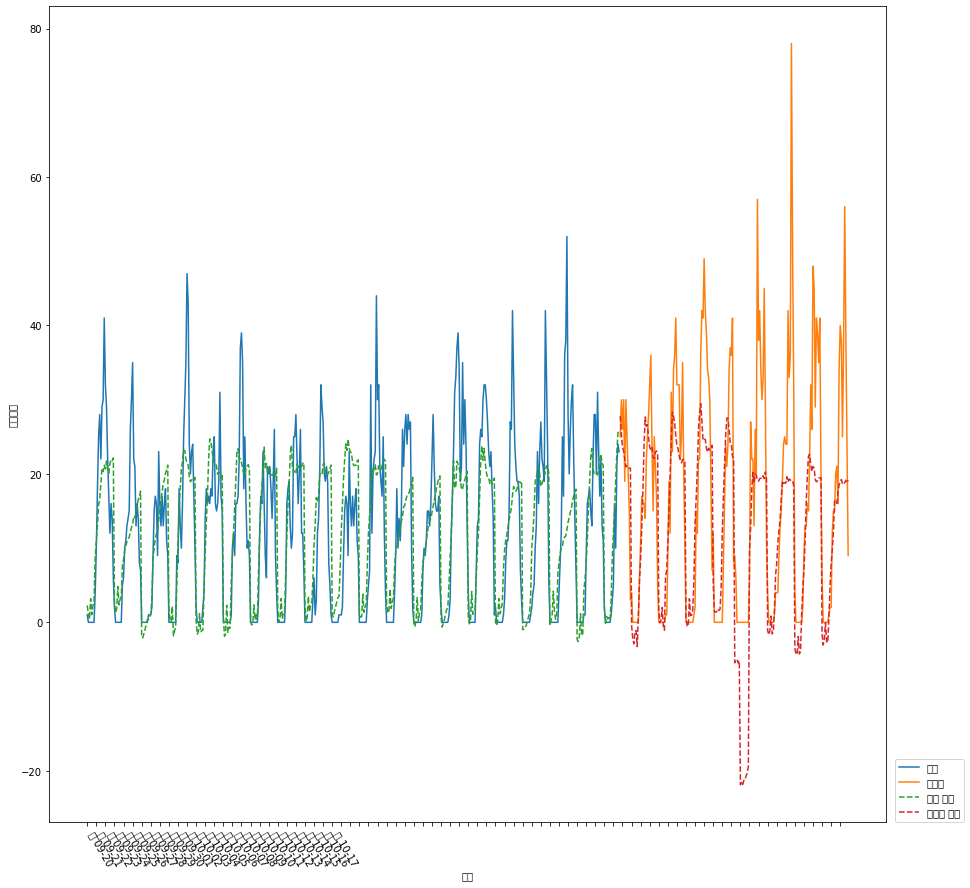

In [47]:
from sklearn.linear_model import LinearRegression

X_hour_week = np.hstack([df.hour.values.reshape(-1,1), df.기온.values.reshape(-1,1),
                        df.습도.values.reshape(-1,1),df.temp.values.reshape(-1,1),
                         df.light.values.reshape(-1,1)])
                                             
eval_on_features(X_hour_week, y, LinearRegression())


In [ ]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

테스트 세트 R^2: 0.51


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-p

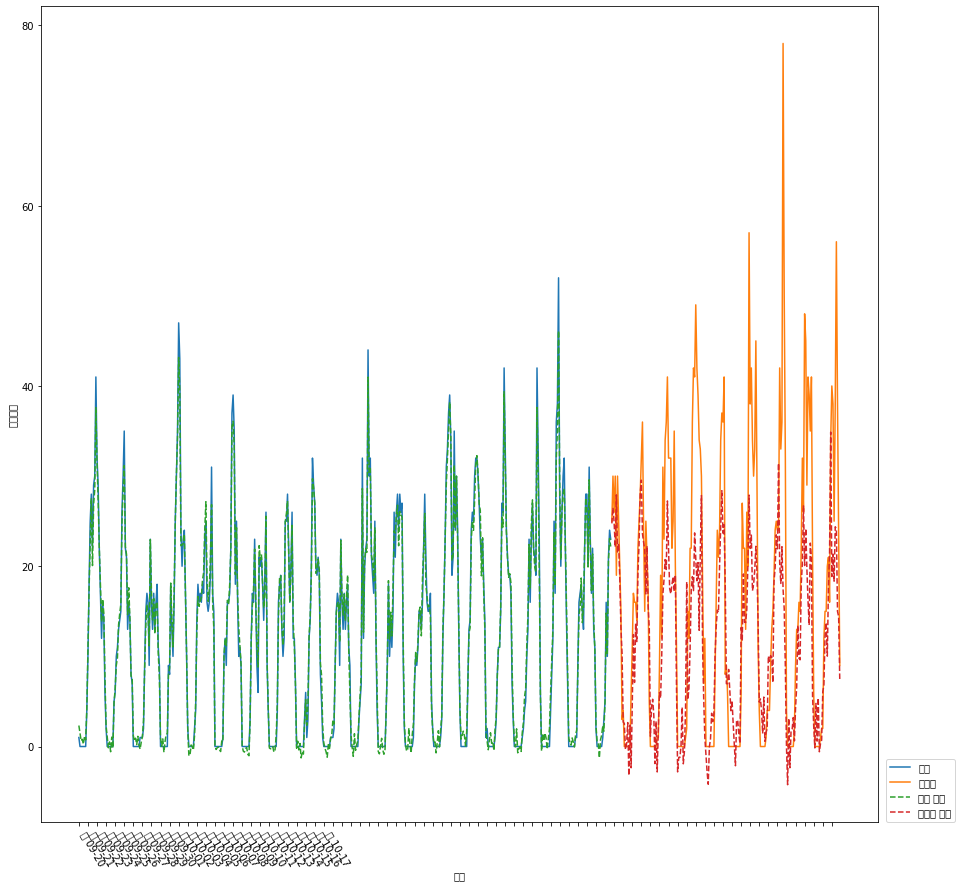

In [28]:
from sklearn.linear_model import Ridge

eval_on_features(X_hour_week_onehot, y, Ridge())

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

MemoryError: Unable to allocate array with shape (672, 1088550) and data type float64

In [ ]:
hour = ["%02d:00" % i for i in range(0,24,3)]
day = ["월","화","수","목","금","토","일"]
features = day + hour